In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
sns.set_theme()

### Функции создания нужной матрицы пластины
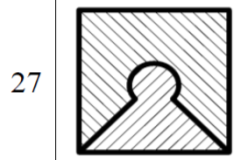
  
Она состоит из круга с центром в центре пластины и функции модуля, выходящей тоже из центра  
Пусть центр пластины имеет координаты $x_{cent}$ и $y_{cent}$ 
Таким образом функция от *i*, *j*, дающая нужную пластину будет:  
   

 

In [2]:
def built_plate(plate_size=100):
    x_center = int(plate_size / 2)
    y_center = int(plate_size / 2)
    radius = plate_size / 5
    plate = np.zeros((plate_size, plate_size))
    
    needed_dots = []
    
    for i, row in enumerate(plate):
        for j, elem in enumerate(row):
            if i <= (-abs(j - x_center) + y_center):
                plate[i, j] = 2
            elif -(i - x_center)**2 + radius**2 > 0 and  \
            j <= (np.sqrt(-(i - x_center)**2 + radius**2) + y_center) and \
            j >= (-np.sqrt(-(i - x_center)**2 + radius**2) + y_center):
                plate[i, j] = 2
            else:
                plate[i, j] = 0
                needed_dots.append([i, j])
                
    return plate, needed_dots

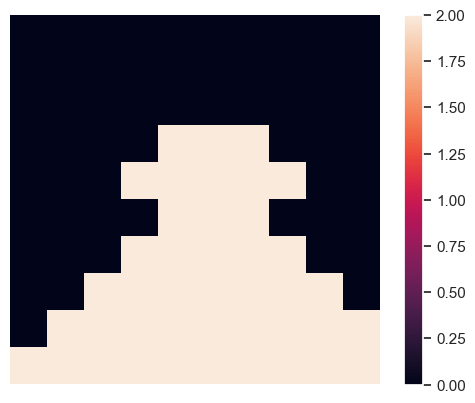

In [3]:
fig, ax = plt.subplots(1, 1)
im = ax.imshow(built_plate(10)[0][::-1])
fig.colorbar(im, ax=ax, label='')
ax.axis('off')
None

Давайте обозначим условия на разные типы данных, которые нам нужны: мы уже обозначили малую часть пластины, нужны граничные условия и те которые нужно найти 

In [4]:
def fill_around(matrix, dot):
    x, y = dot[0], dot[1]    
    #upper
    if (x + 1 < matrix.shape[0] and matrix[x + 1][y] == 0):
        matrix[x + 1][y] = 1
    #left
    if (y - 1 > 0 and matrix[x][y-1] == 0):
        matrix[x][y - 1] = 1
    #right
    if (y + 1 < matrix.shape[1] and matrix[x][y + 1] == 0):
         matrix[x][y + 1] = 1
        

In [189]:
test_size = 200
mask, needed_dots = built_plate(test_size)
for i, row in enumerate(mask):
    itemindex = np.where(row == 2)
    if itemindex[0].size != 0:
        first = itemindex[0][0]
        last = itemindex[-1][-1]
    else: 
        first, last = -1, -1
    #print(first, last)
    if first != -1:
        for j in range(first, last + 1, 1):
            fill_around(mask, (i, j))
            
    mask[-1] = 1
    if (mask[i][0]!=2):
        mask[i][0] = 1 
    if (mask[i][-1]!=2):
        mask[i][-1] = 1 
    

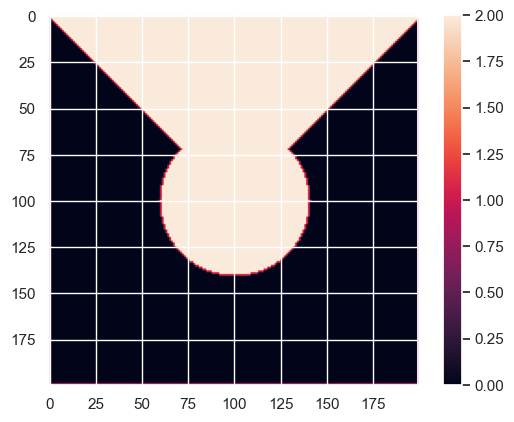

In [190]:
fig, ax = plt.subplots(1, 1)
im = ax.imshow(mask)
fig.colorbar(im, ax=ax, label='')
#ax.axis('off')
None

In [191]:
#словарь переводящий номера переменных в точки
sole_to_matrix = {
    num:coord for num, coord in enumerate(needed_dots)
}
len(sole_to_matrix)

26061

In [192]:
def test_func(x, y):
    return -2*np.pi**2*np.sin(np.pi*x)*np.sin(np.pi*y)

In [193]:
a = 0
b = 1
h = 1/test_size
x = np.arange(a, b, h)
y = np.arange(a, b, h)
F = test_func(x[:, None], y[None, :])
print(x.shape)
print(y.shape)
print(F.shape)
print(mask.shape)

(200,)
(200,)
(200, 200)
(200, 200)


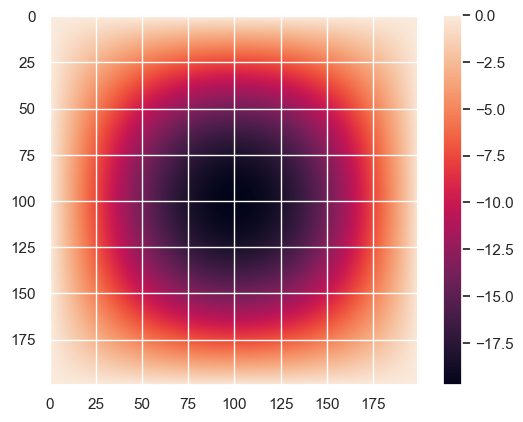

In [194]:
fig, ax = plt.subplots(1, 1)
im = ax.imshow(F)
fig.colorbar(im, ax=ax, label='')

In [195]:
indx = np.where([mask[-2] == 0])[1]
print(indx)
print(indx - 1)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  

In [196]:
U_prev = np.zeros_like(mask)
U_next = np.zeros_like(mask)
eps = 1e-6

for i, row in enumerate(U_next):
    indx = np.where([mask[i] == 0])[1]
    if indx.shape[0] != 0:
        #up, down:
        U_next[i][indx] = U_next[i][indx] + U_prev[i - 1][indx]
        U_next[i][indx] = U_next[i][indx] + U_prev[i + 1][indx]
        #left, right
        U_next[i][indx] = U_next[i][indx] + U_prev[i][indx - 1]
        U_next[i][indx] = U_next[i][indx] + U_prev[i][indx + 1]
        #linear
        U_next[i][indx] /= 4
        U_next[i][indx] -= (h**2 / 4)*F[i][indx]
    
norm = np.linalg.norm(U_next - U_prev, ord=np.inf)       
print(norm)
iterator = 0
while norm > eps and iterator<100000:
    U_prev = U_next.copy()
    for i, row in enumerate(U_next):
        #indx = np.where([mask[i] == 0])[1]
        #if indx.shape[0] != 0:
            #up, down:
        #    U_next[i][indx] = U_next[i][indx] + U_prev[i - 1][indx]
        #    U_next[i][indx] = U_next[i][indx] + U_prev[i + 1][indx]
            
            
            #left, right
        #    U_next[i][indx] = U_next[i][indx] + U_prev[i][indx - 1]
        #    U_next[i][indx] = U_next[i][indx] + U_prev[i][indx + 1]
            
            
            #linear
         #   U_next[i][indx] /= 4
         #  U_next[i][indx] -= (h**2 / 4)*F[i][indx]

        #Явное решение
        for j, elem in enumerate(U_next):
            if mask[i, j] == 0:
                U_next[i][j] = 1/4*(U_next[i-1][j] + U_next[i+1][j] + U_next[i][j-1] + U_next[i][j+1]) - h**2/4*F[i][j]
        
    norm = np.linalg.norm(U_next - U_prev, ord=np.inf)
    if iterator % 10 == 0:
        print(f"{iterator} шаг, норма = {norm}" )
    
    iterator += 1

0.01255960931759808
0 шаг, норма = 0.02442509161916942
10 шаг, норма = 0.02306743102269143
20 шаг, норма = 0.022324324568553666
30 шаг, норма = 0.021745208429135306
40 шаг, норма = 0.021254906806102185
50 шаг, норма = 0.020814937082767708
60 шаг, норма = 0.020427176800662514
70 шаг, норма = 0.02006217097551858
80 шаг, норма = 0.019729075086055883
90 шаг, норма = 0.019406621267088094
100 шаг, норма = 0.019112934401955252
110 шаг, норма = 0.01882831130941682
120 шаг, норма = 0.01855180436923507
130 шаг, норма = 0.018295760422729016
140 шаг, норма = 0.01804640854561954
150 шаг, норма = 0.01780315374126441
160 шаг, норма = 0.017567493693345895
170 шаг, норма = 0.017344715801417263
180 шаг, норма = 0.017126606386089017
190 шаг, норма = 0.016913062748595754
200 шаг, норма = 0.016703960954146422
210 шаг, норма = 0.01650123236801157
220 шаг, норма = 0.016306418410522577
230 шаг, норма = 0.016115100137930504
240 шаг, норма = 0.015927186475343226
250 шаг, норма = 0.01574258271399946
260 шаг, нор

2130 шаг, норма = 0.0022982802183051025
2140 шаг, норма = 0.002274704896989912
2150 шаг, норма = 0.0022513675423343196
2160 шаг, норма = 0.002228265821070709
2170 шаг, норма = 0.002205397421581801
2180 шаг, норма = 0.0021827600537234347
2190 шаг, норма = 0.0021603514486436474
2200 шаг, норма = 0.0021381693586059896
2210 шаг, норма = 0.0021162115568127615
2220 шаг, норма = 0.002094475837231005
2230 шаг, норма = 0.002072960014415727
2240 шаг, норма = 0.002051661923341346
2250 шаг, норма = 0.002030579419226256
2260 шаг, норма = 0.0020097103773635766
2270 шаг, норма = 0.00198905269295285
2280 шаг, норма = 0.001968604280930526
2290 шаг, норма = 0.0019483630758027354
2300 шаг, норма = 0.0019283270314813606
2310 шаг, норма = 0.0019084941211162114
2320 шаг, норма = 0.0018888623369345426
2330 шаг, норма = 0.001869429690075509
2340 шаг, норма = 0.0018501942104308848
2350 шаг, норма = 0.0018311539464836105
2360 шаг, норма = 0.0018123069651490961
2370 шаг, норма = 0.0017936513516160968
2380 шаг, н

4190 шаг, норма = 0.0002684130933814123
4200 шаг, норма = 0.00026561076776021727
4210 шаг, норма = 0.0002628375935712357
4220 шаг, норма = 0.00026009326936571884
4230 шаг, норма = 0.00025737749678241646
4240 шаг, норма = 0.00025468998051477853
4250 шаг, норма = 0.00025203042827914553
4260 шаг, норма = 0.0002493985507888959
4270 шаг, норма = 0.0002467940617185958
4280 шаг, норма = 0.0002442166776782072
4290 шаг, норма = 0.0002416661181816773
4300 шаг, норма = 0.00023914210561671494
4310 шаг, норма = 0.00023664436522010746
4320 шаг, норма = 0.00023417262504319596
4330 шаг, норма = 0.0002317266159277149
4340 шаг, норма = 0.00022930607147621154
4350 шаг, норма = 0.00022691072802327608
4360 шаг, норма = 0.00022454032461000995
4370 шаг, норма = 0.00022219460295531913
4380 шаг, норма = 0.0002198733074273893
4390 шаг, норма = 0.00021757618502036592
4400 шаг, норма = 0.00021530298532658866
4410 шаг, норма = 0.0002130534605074637
4420 шаг, норма = 0.00021082736527133598
4430 шаг, норма = 0.00020

6230 шаг, норма = 3.137329753290317e-05
6240 шаг, норма = 3.104436006006253e-05
6250 шаг, норма = 3.071886796703321e-05
6260 шаг, норма = 3.0396785223379616e-05
6270 шаг, норма = 3.007807617452958e-05
6280 шаг, норма = 2.976270553713264e-05
6290 шаг, норма = 2.9450638396751137e-05
6300 шаг, норма = 2.9141840202670348e-05
6310 шаг, норма = 2.8836276765788205e-05
6320 шаг, норма = 2.853391425109873e-05
6330 шаг, норма = 2.8234719180017e-05
6340 шаг, норма = 2.7938658420753604e-05
6350 шаг, норма = 2.7645699187657177e-05
6360 шаг, норма = 2.7355809038769312e-05
6370 шаг, норма = 2.7068955868226035e-05
6380 шаг, норма = 2.6785107907373665e-05
6390 шаг, норма = 2.6504233717169427e-05
6400 шаг, норма = 2.6226302189041005e-05
6410 шаг, норма = 2.595128253672944e-05
6420 шаг, норма = 2.5679144296653425e-05
6430 шаг, норма = 2.5409857323194316e-05
6440 шаг, норма = 2.5143391784624748e-05
6450 шаг, норма = 2.4879718161858327e-05
6460 шаг, норма = 2.4618807242080595e-05
6470 шаг, норма = 2.436063

8270 шаг, норма = 3.6482316255262437e-06
8280 шаг, норма = 3.609935664865803e-06
8290 шаг, норма = 3.5720415968803175e-06
8300 шаг, норма = 3.534545205349099e-06
8310 шаг, норма = 3.497442319031537e-06
8320 шаг, норма = 3.4607288102099336e-06
8330 шаг, норма = 3.424400593764459e-06
8340 шаг, норма = 3.388453628684965e-06
8350 шаг, норма = 3.3528839140581357e-06
8360 шаг, норма = 3.317687493938591e-06
8370 шаг, норма = 3.2828604514920263e-06
8380 шаг, норма = 3.2483989123120033e-06
8390 шаг, норма = 3.214299041002979e-06
8400 шаг, норма = 3.1805570445920736e-06
8410 шаг, норма = 3.1471691680062114e-06
8420 шаг, норма = 3.114131696526322e-06
8430 шаг, норма = 3.081440954151929e-06
8440 шаг, норма = 3.0490933033808405e-06
8450 шаг, норма = 3.017085144669217e-06
8460 шаг, норма = 2.98541291625376e-06
8470 шаг, норма = 2.9540730942119973e-06
8480 шаг, норма = 2.923062191064526e-06
8490 шаг, норма = 2.89237675575333e-06
8500 шаг, норма = 2.8620133737536704e-06
8510 шаг, норма = 2.83196866705

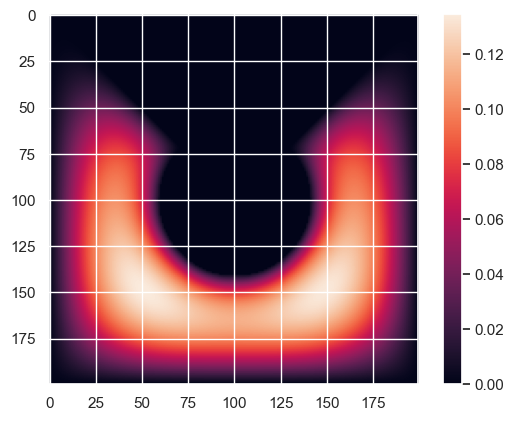

In [197]:
fig, ax = plt.subplots(1, 1)
im = ax.imshow(U_next)
fig.colorbar(im, ax=ax, label='')

In [198]:
import matplotlib
X, Y = np.meshgrid(x, y)

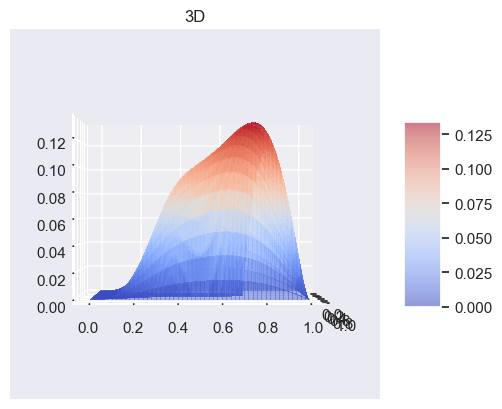

In [199]:
fig = plt.figure()
ax = plt.axes(projection='3d')
im = ax.plot_surface(X, Y, U_next, alpha=0.5, cmap=matplotlib.cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(im, shrink=0.5, aspect=5)
ax.set_title('3D');
ax.view_init(0, 0)

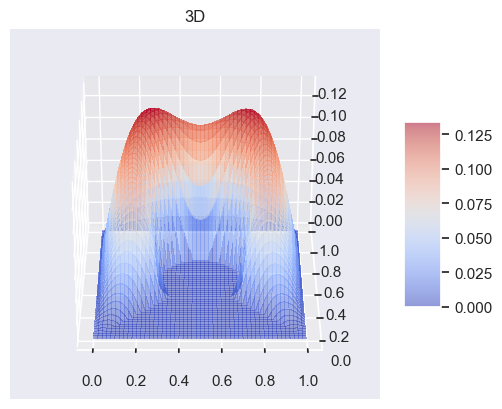

In [200]:
fig = plt.figure()
ax = plt.axes(projection='3d')
im = ax.plot_surface(X, Y, U_next, alpha=0.5, cmap=matplotlib.cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(im, shrink=0.5, aspect=5)
ax.set_title('3D');
ax.view_init(30, 270)

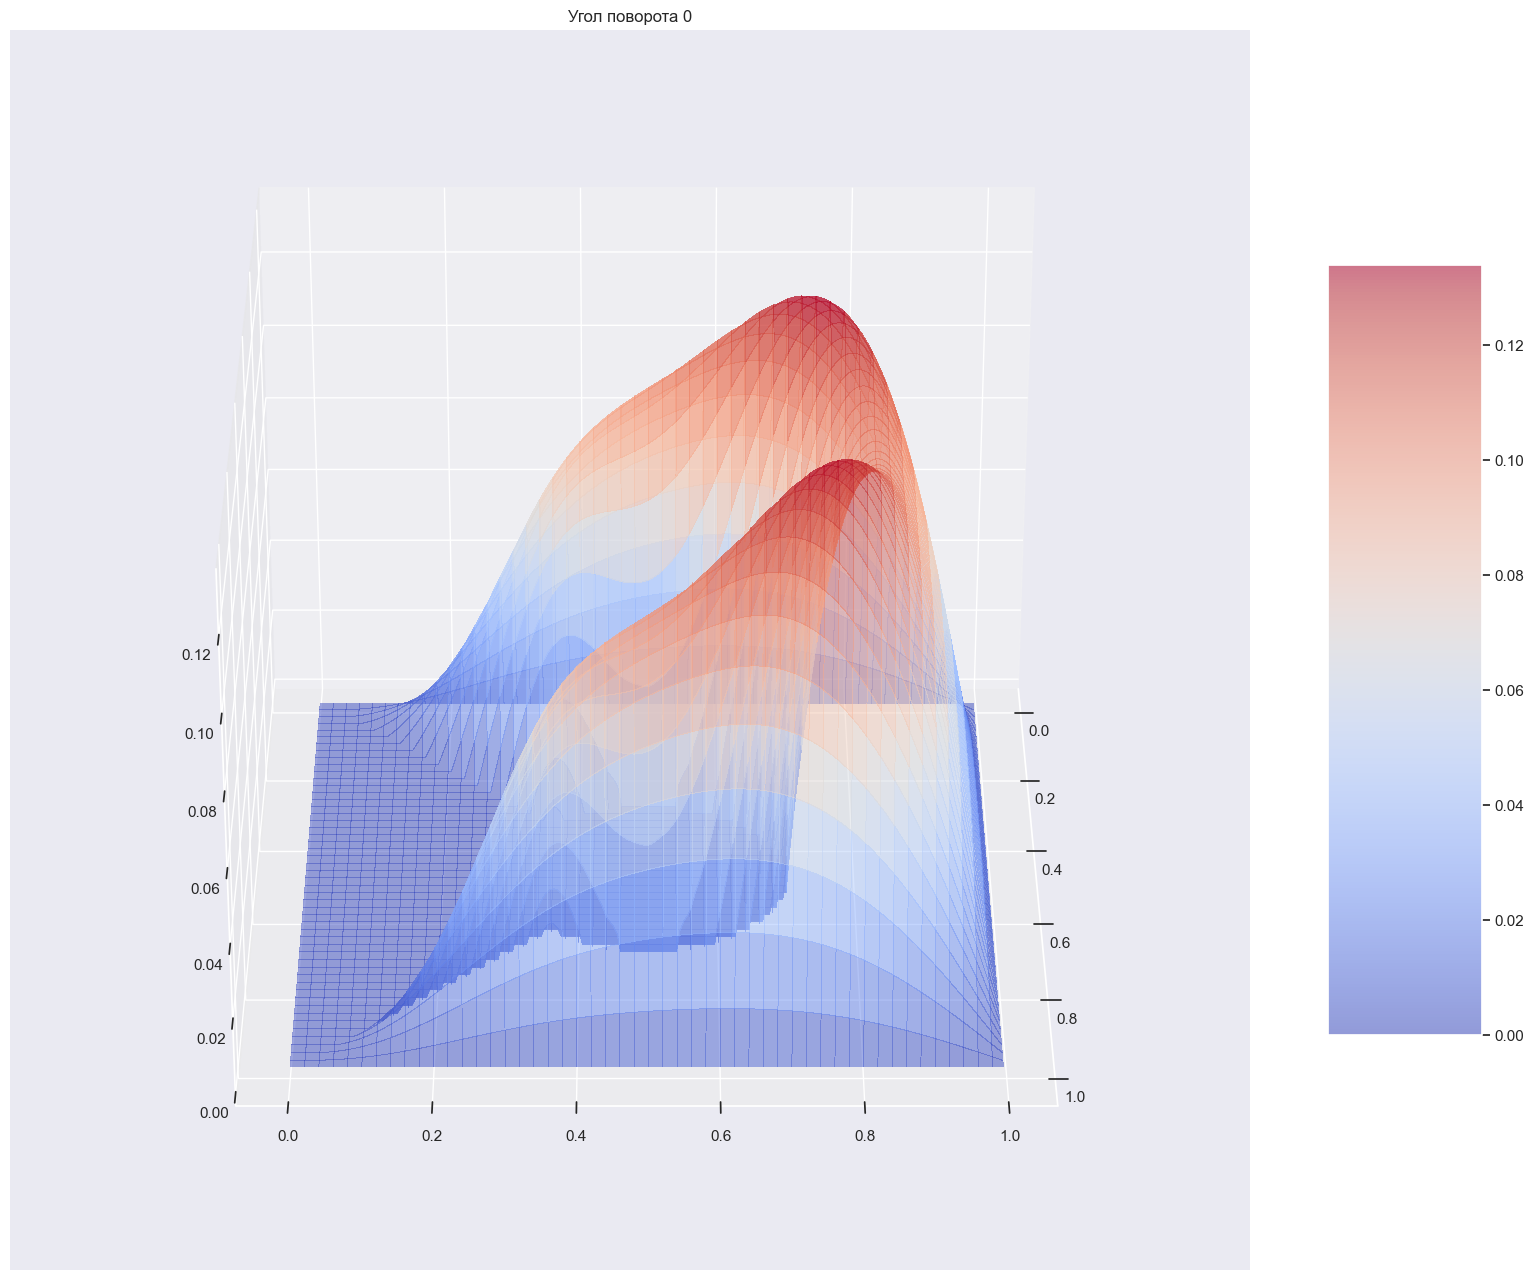

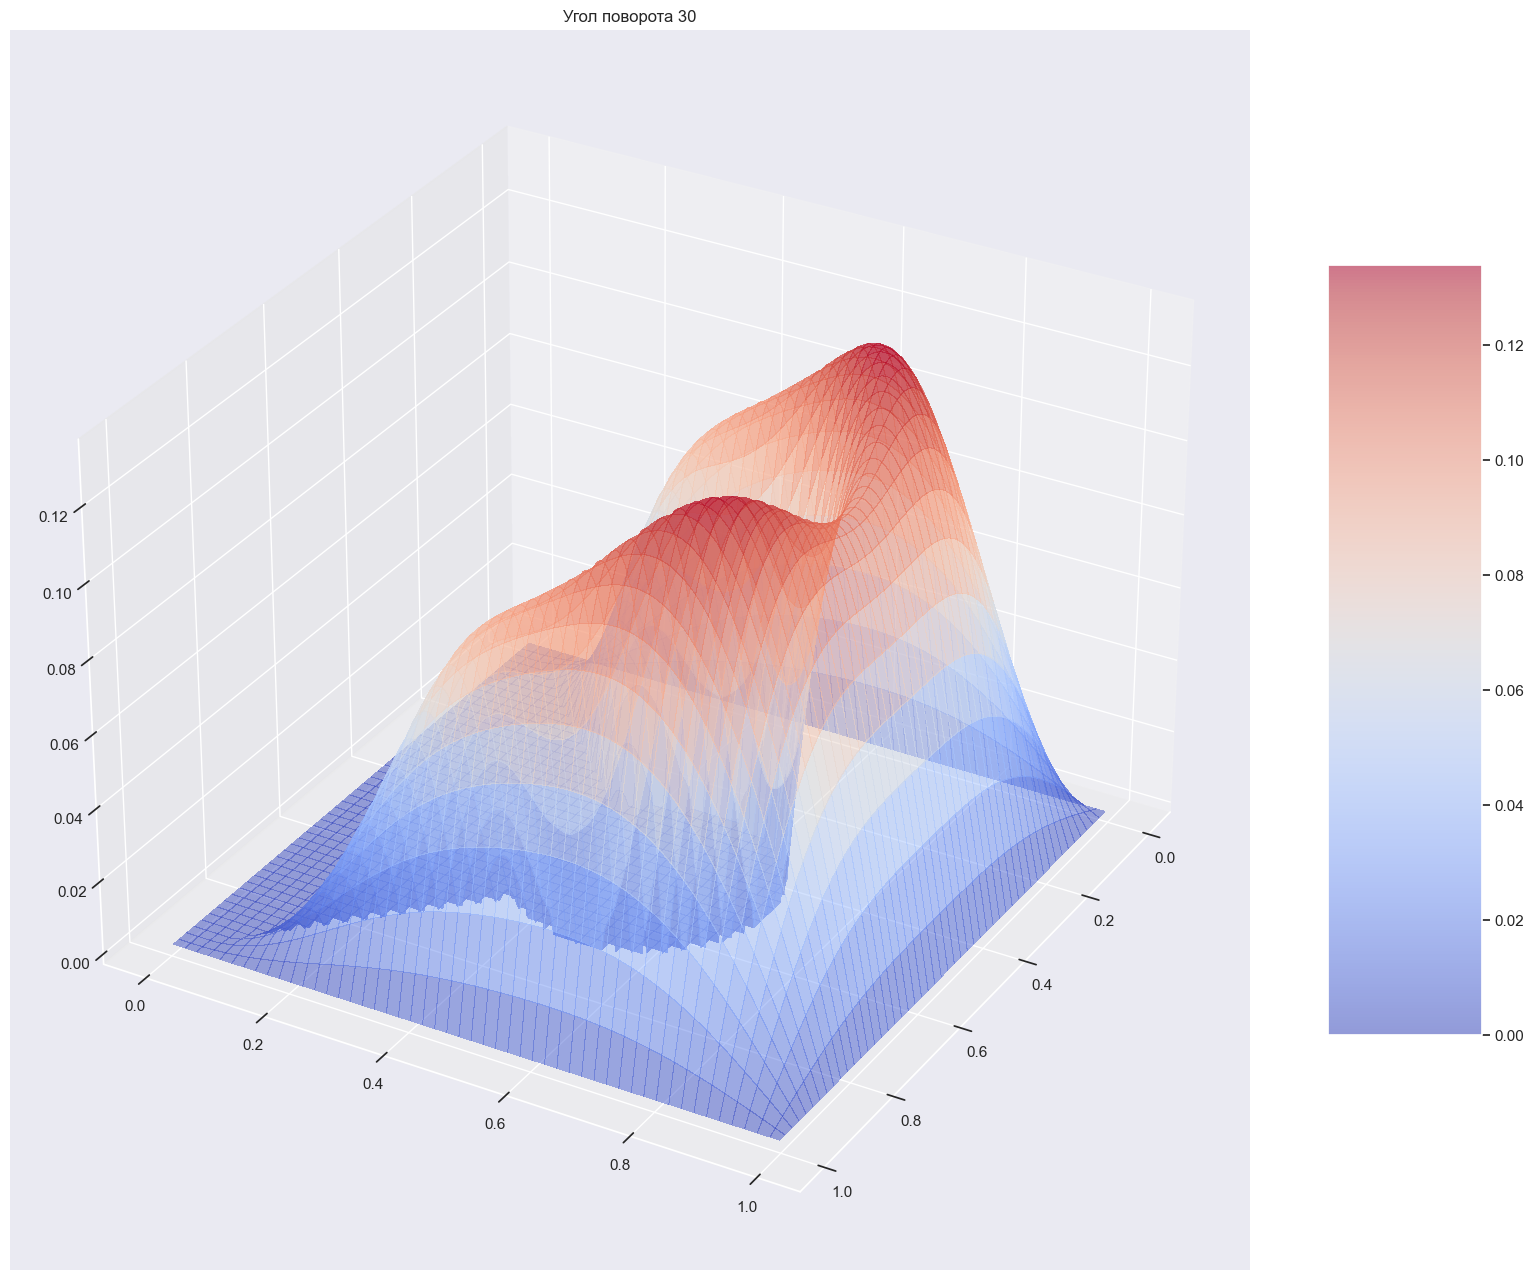

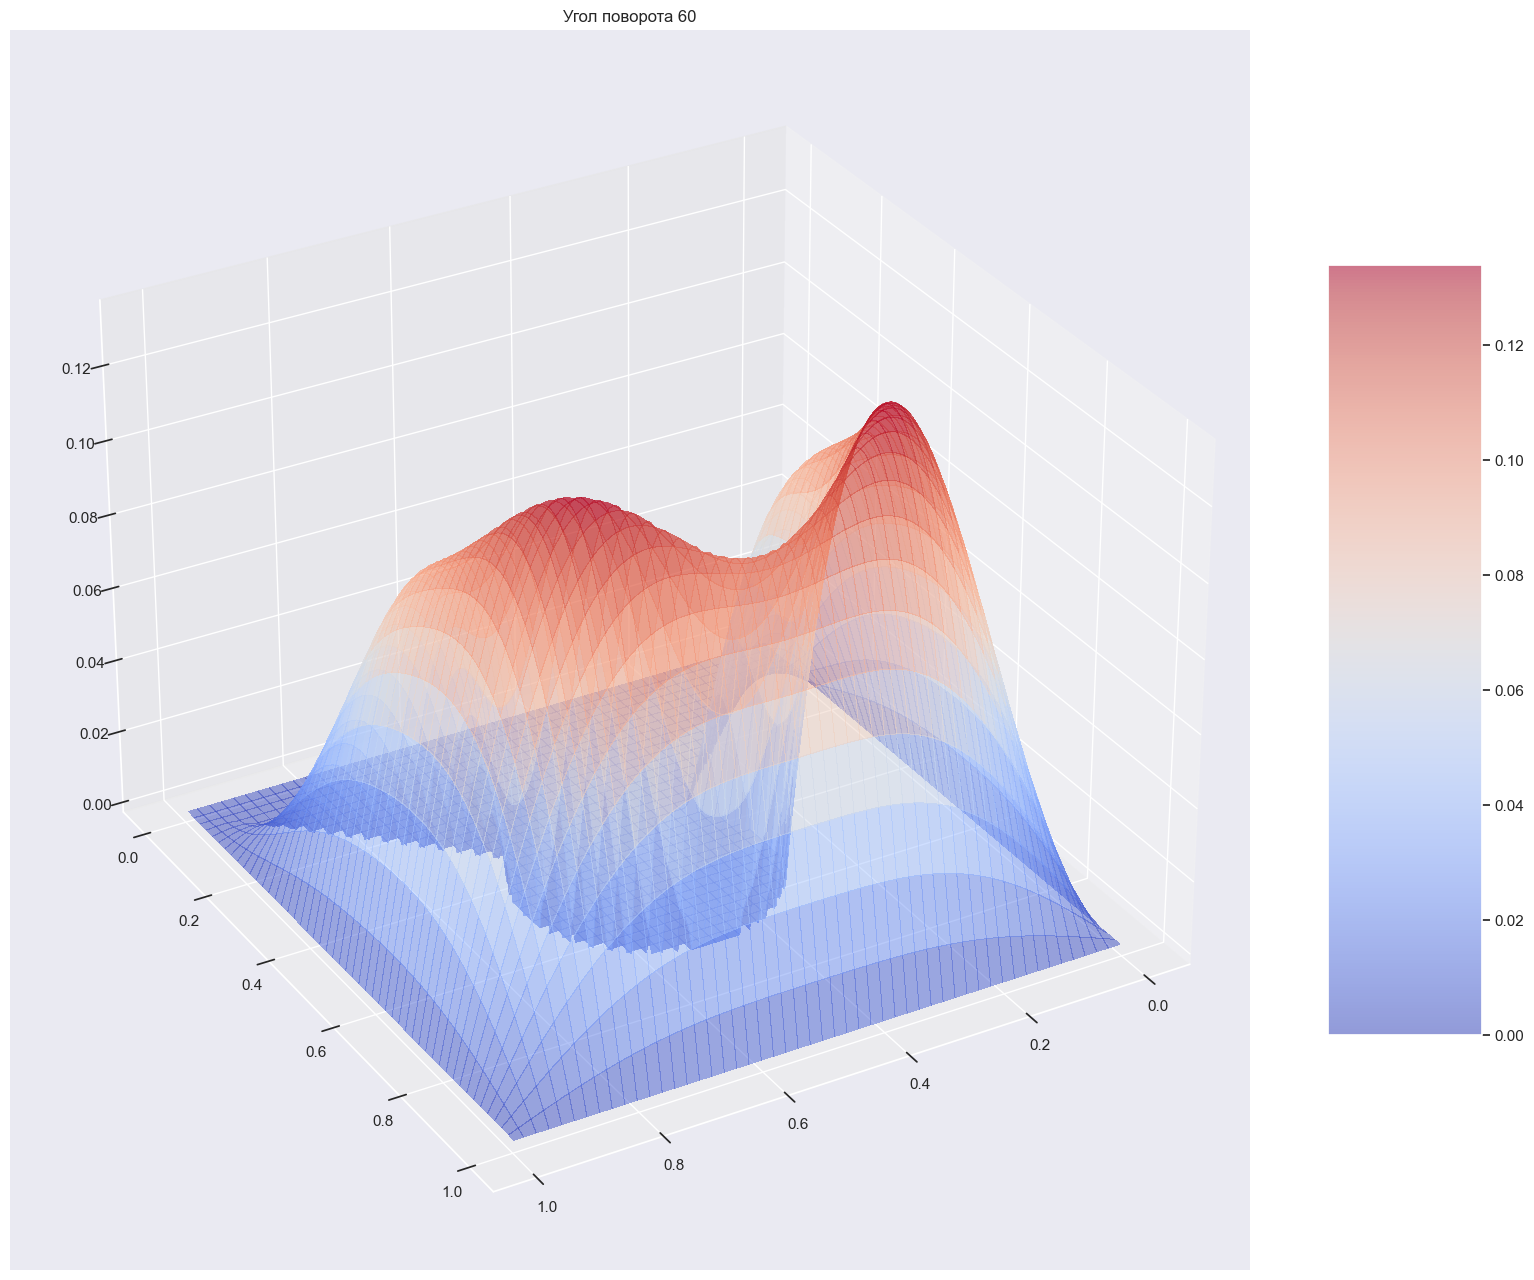

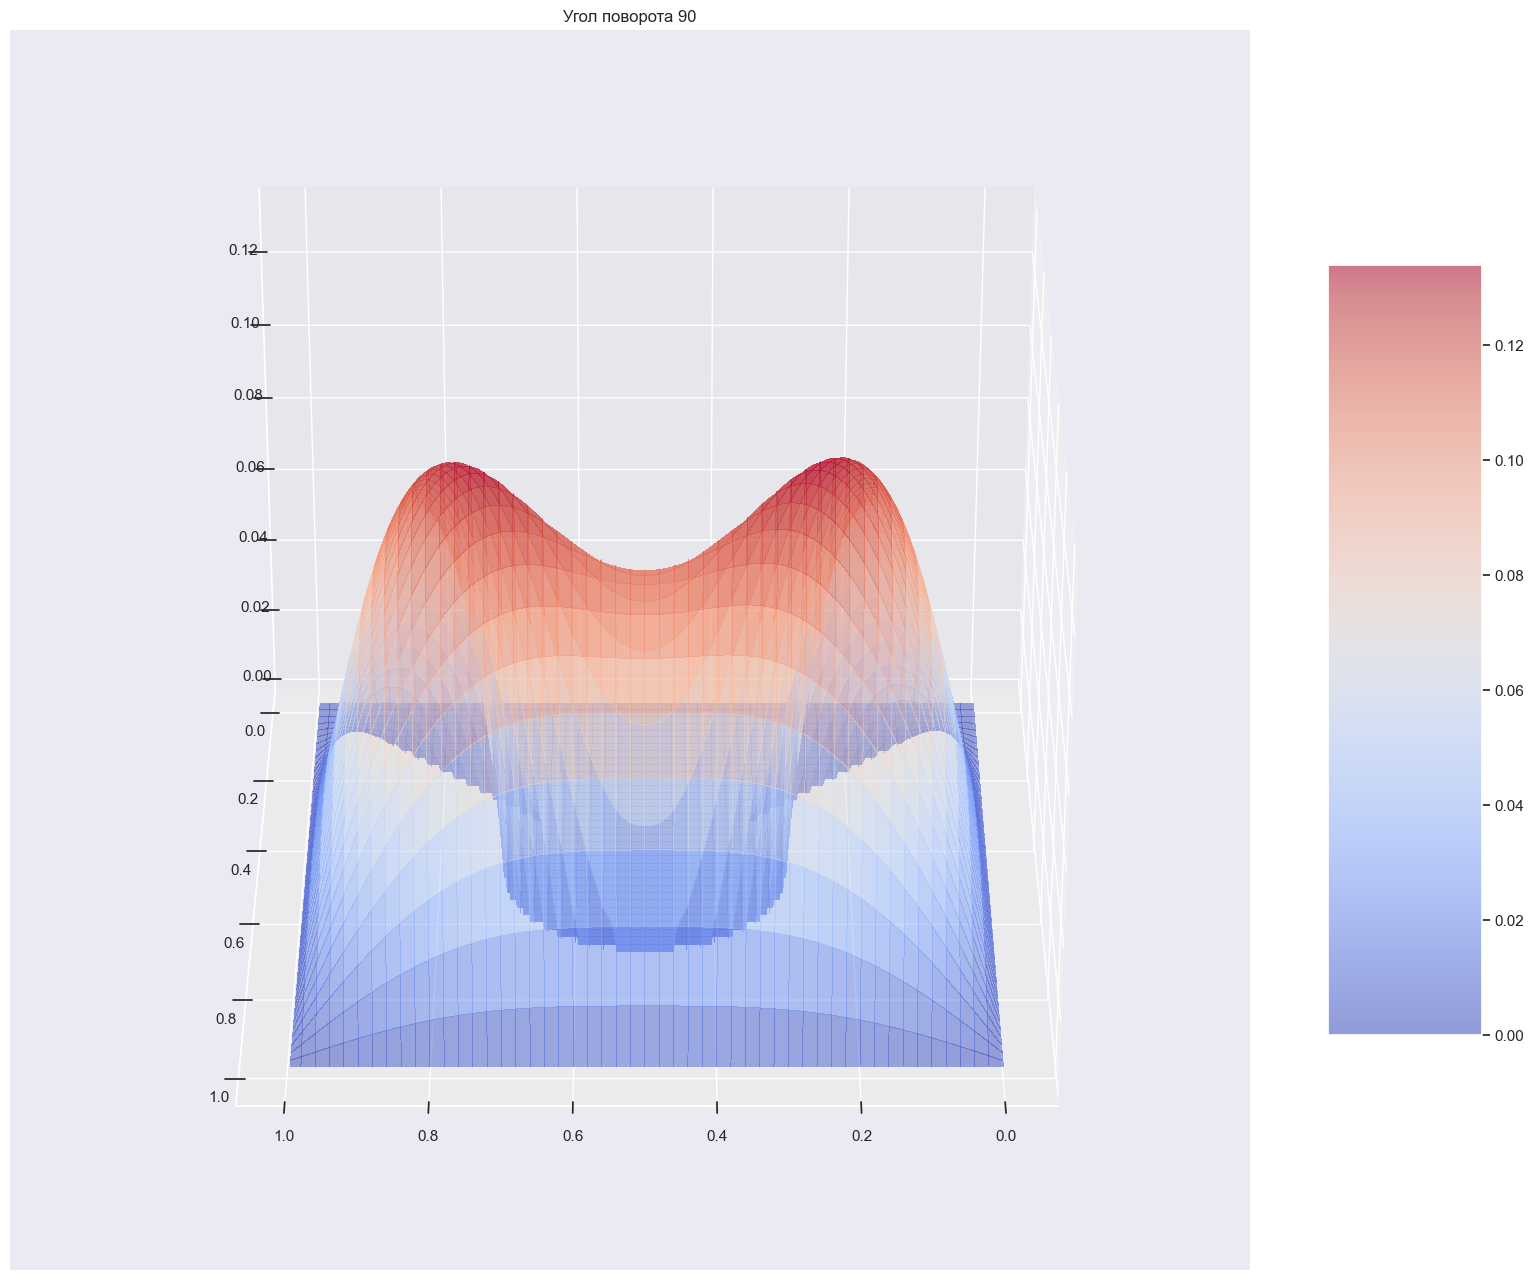

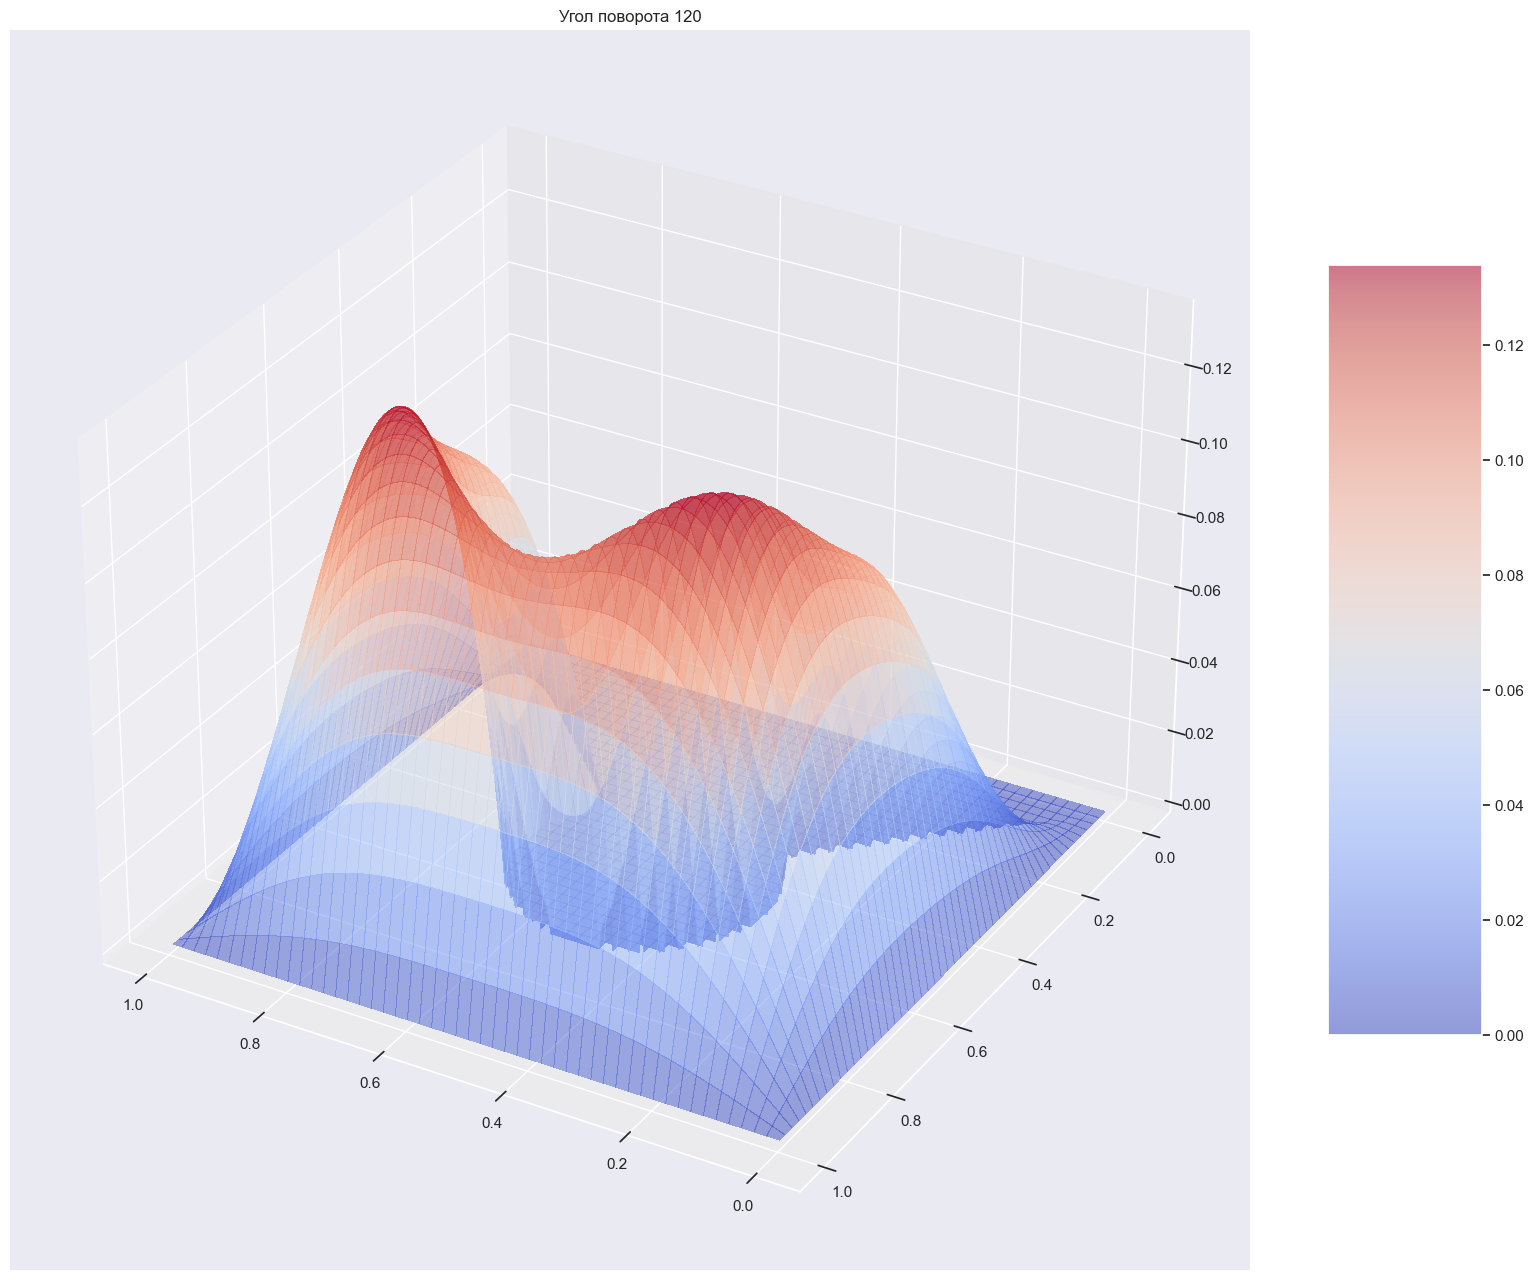

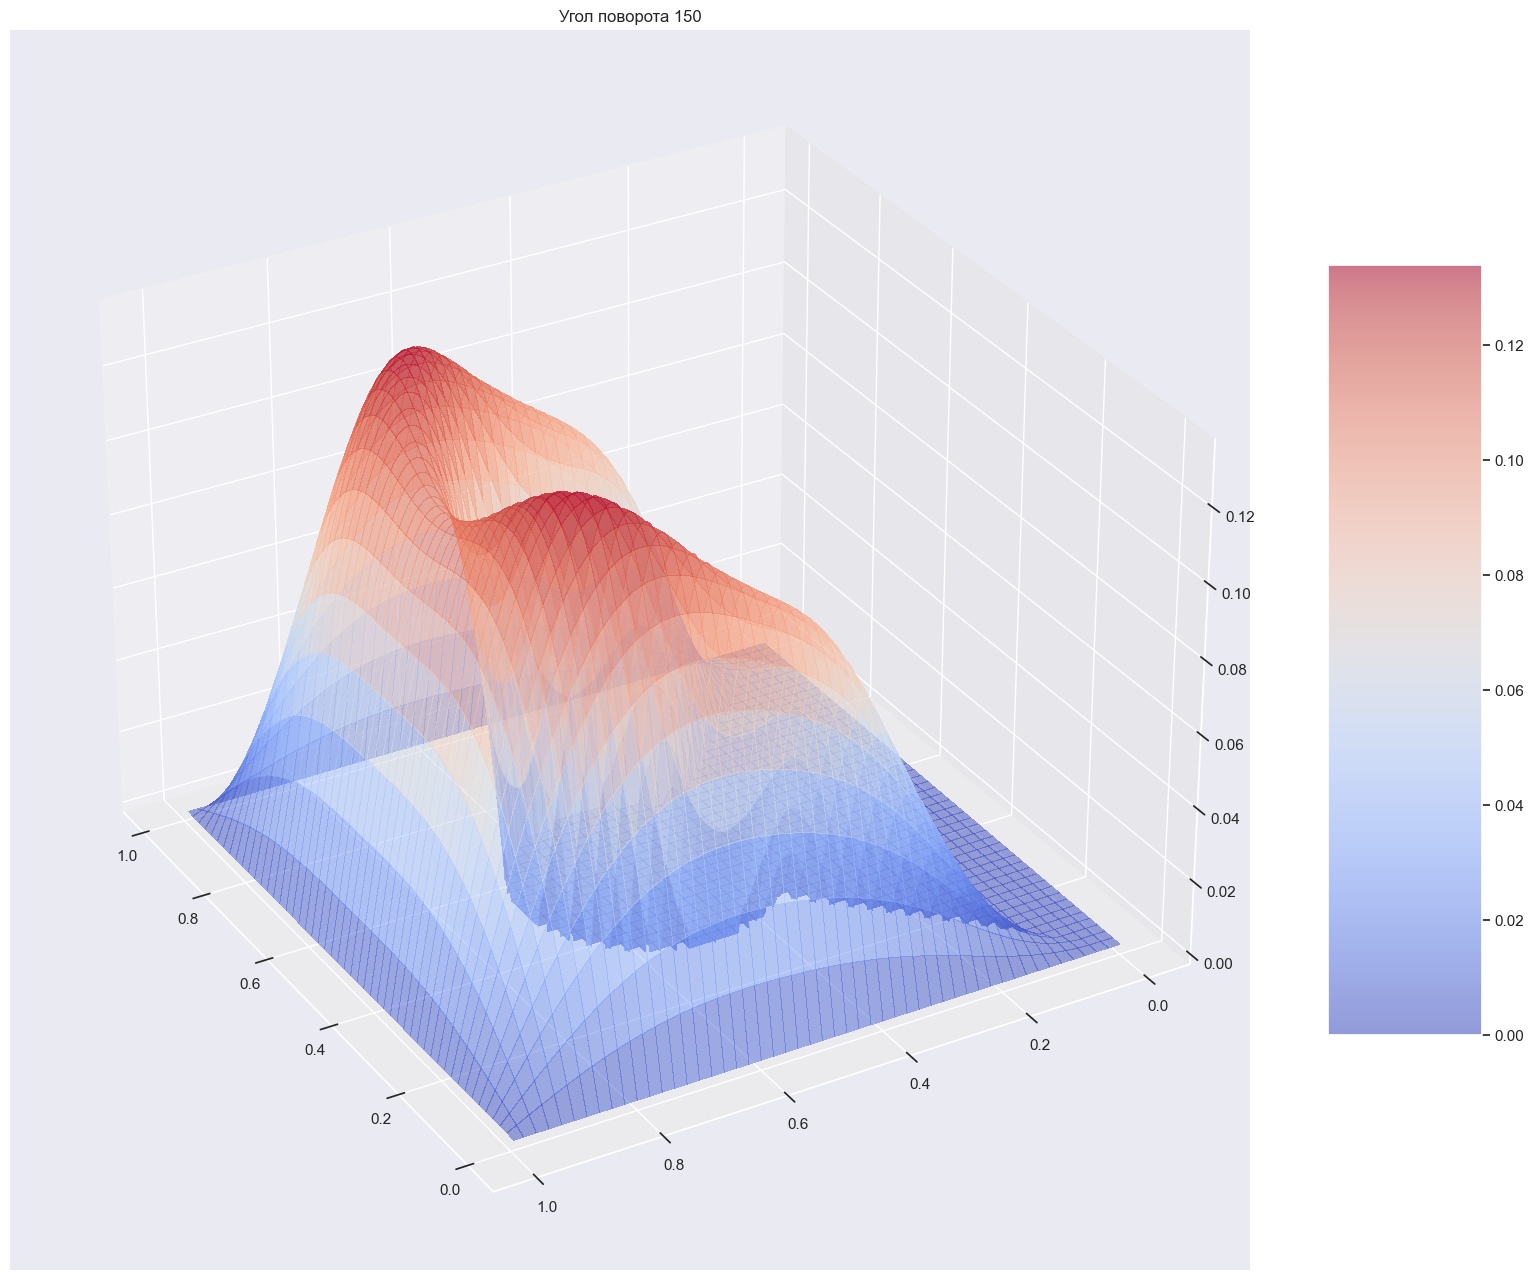

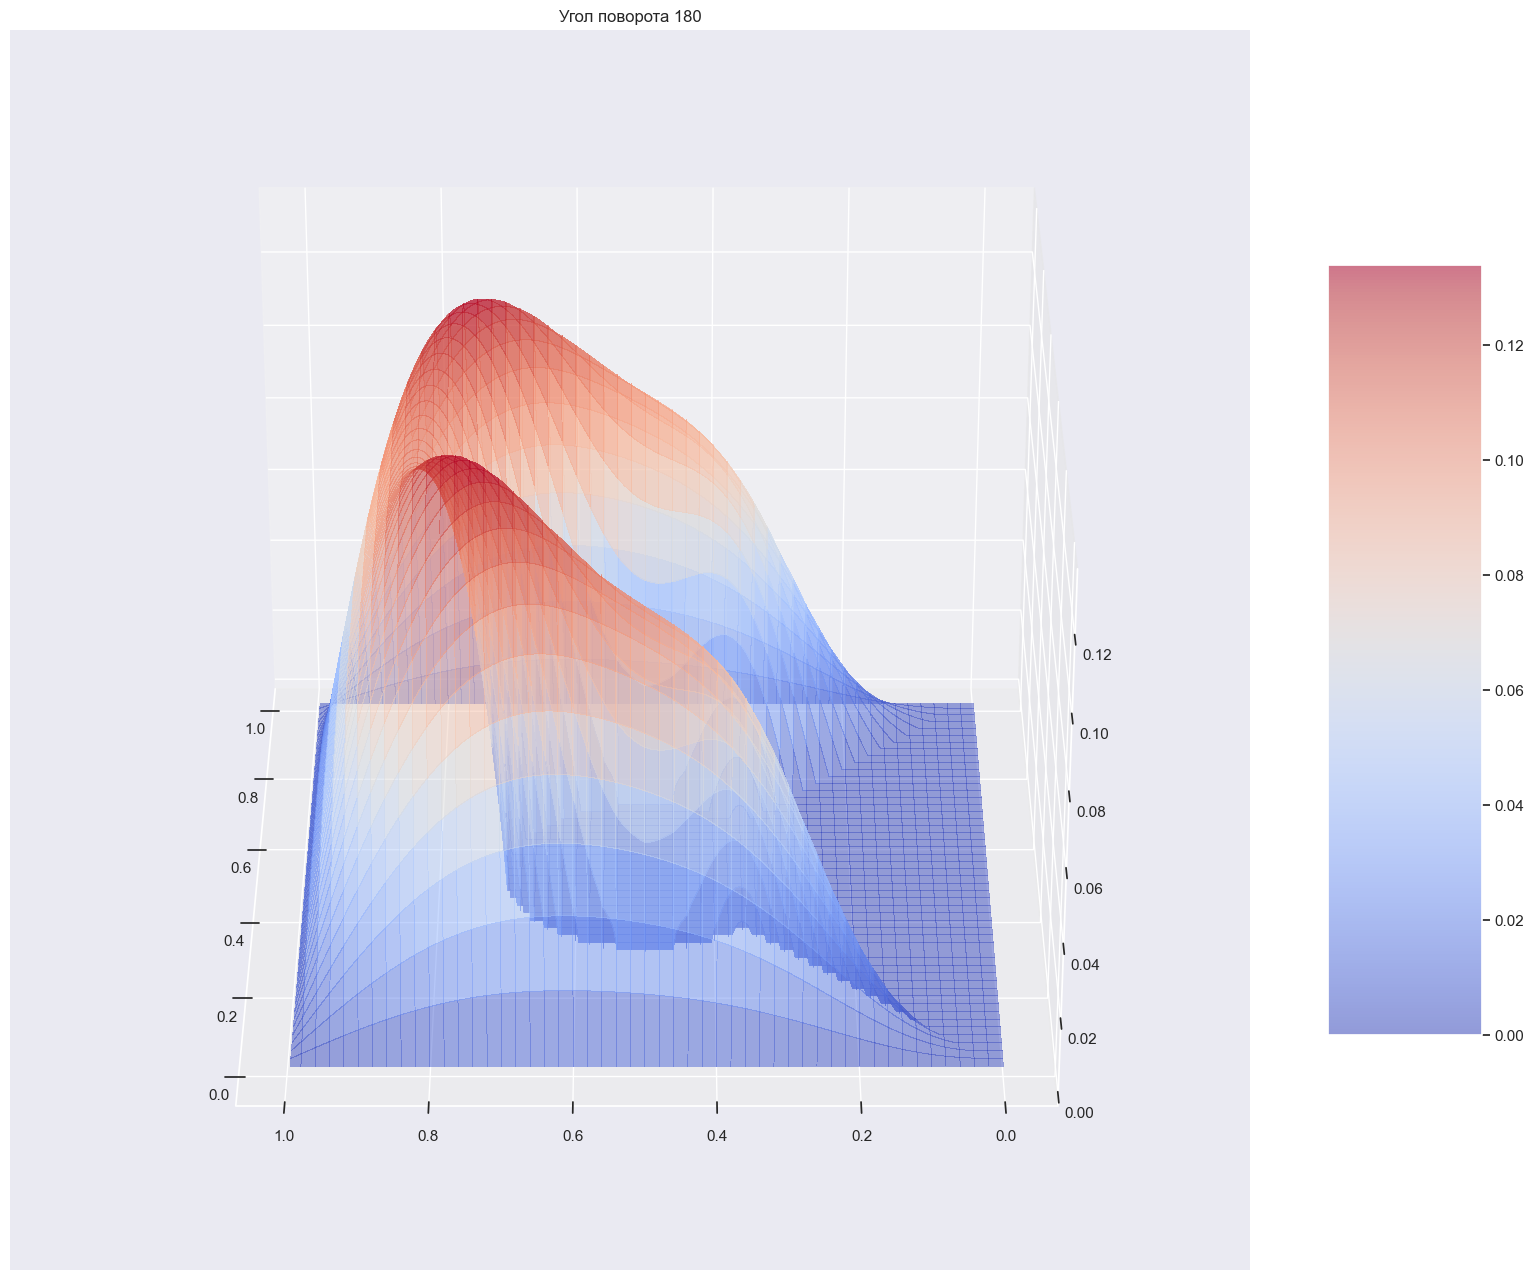

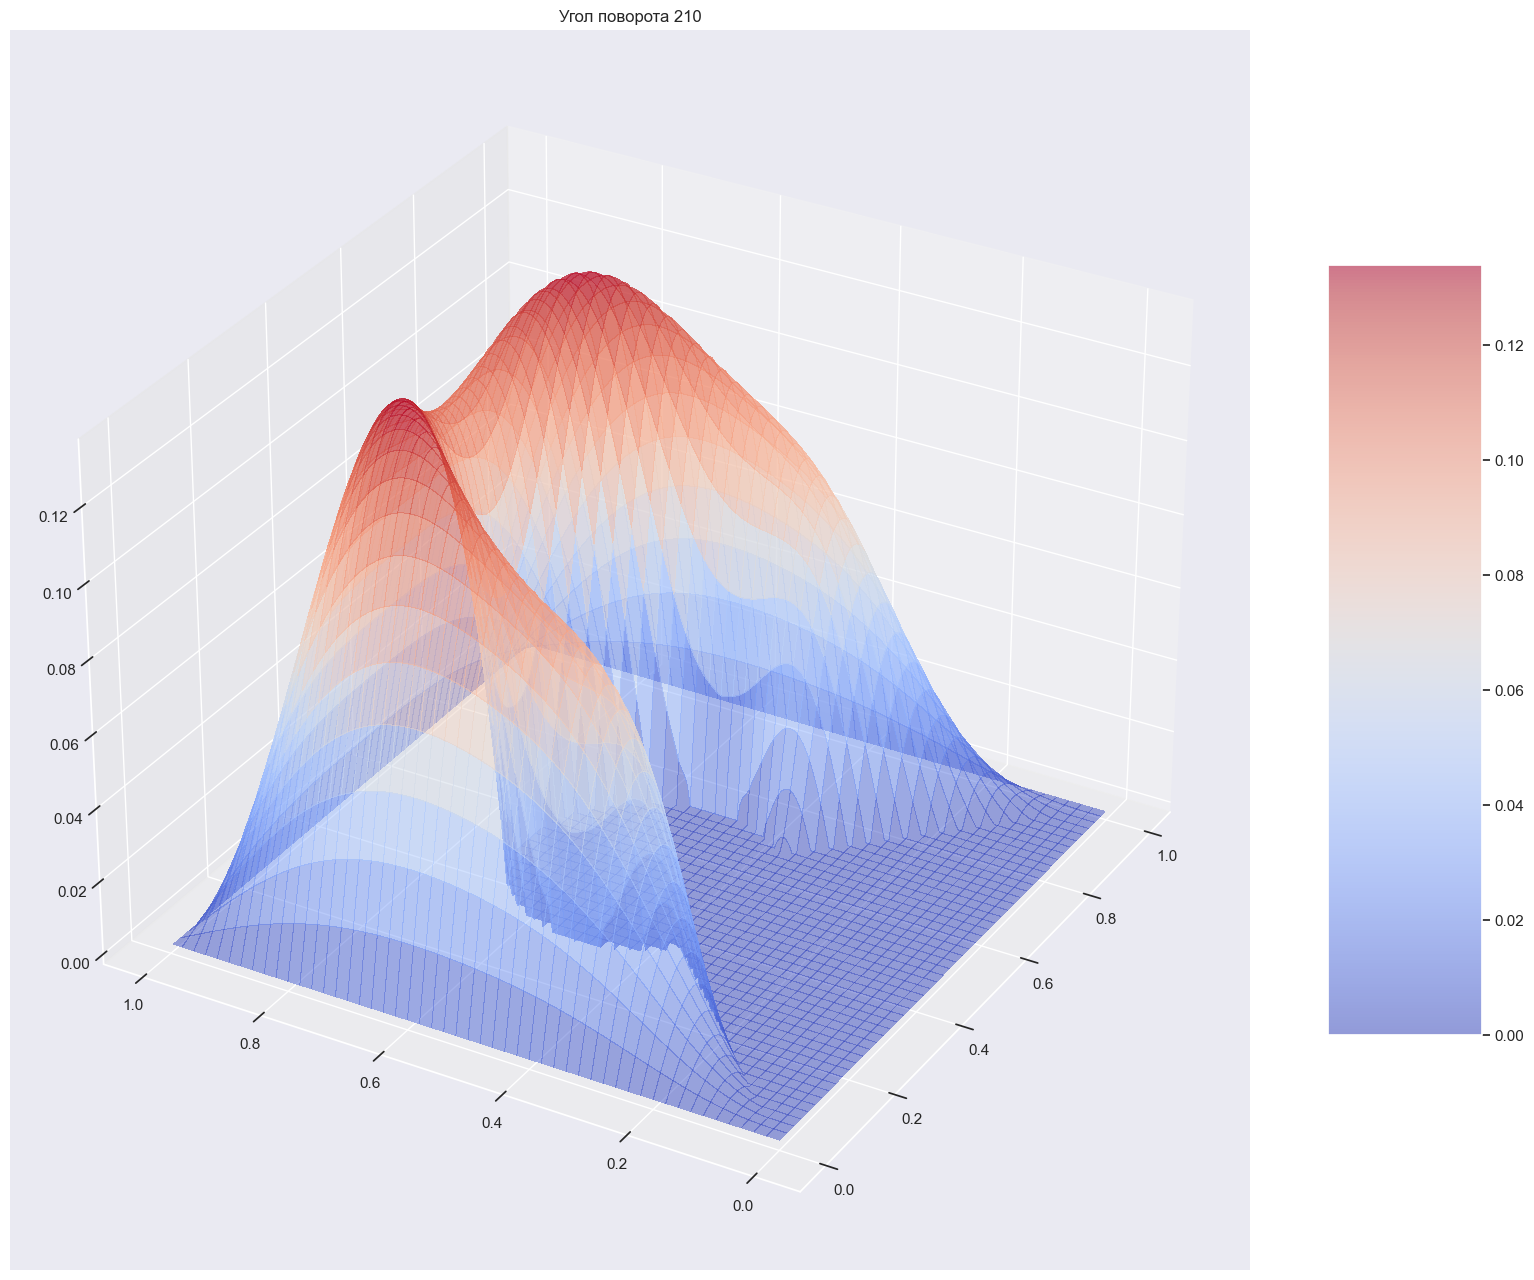

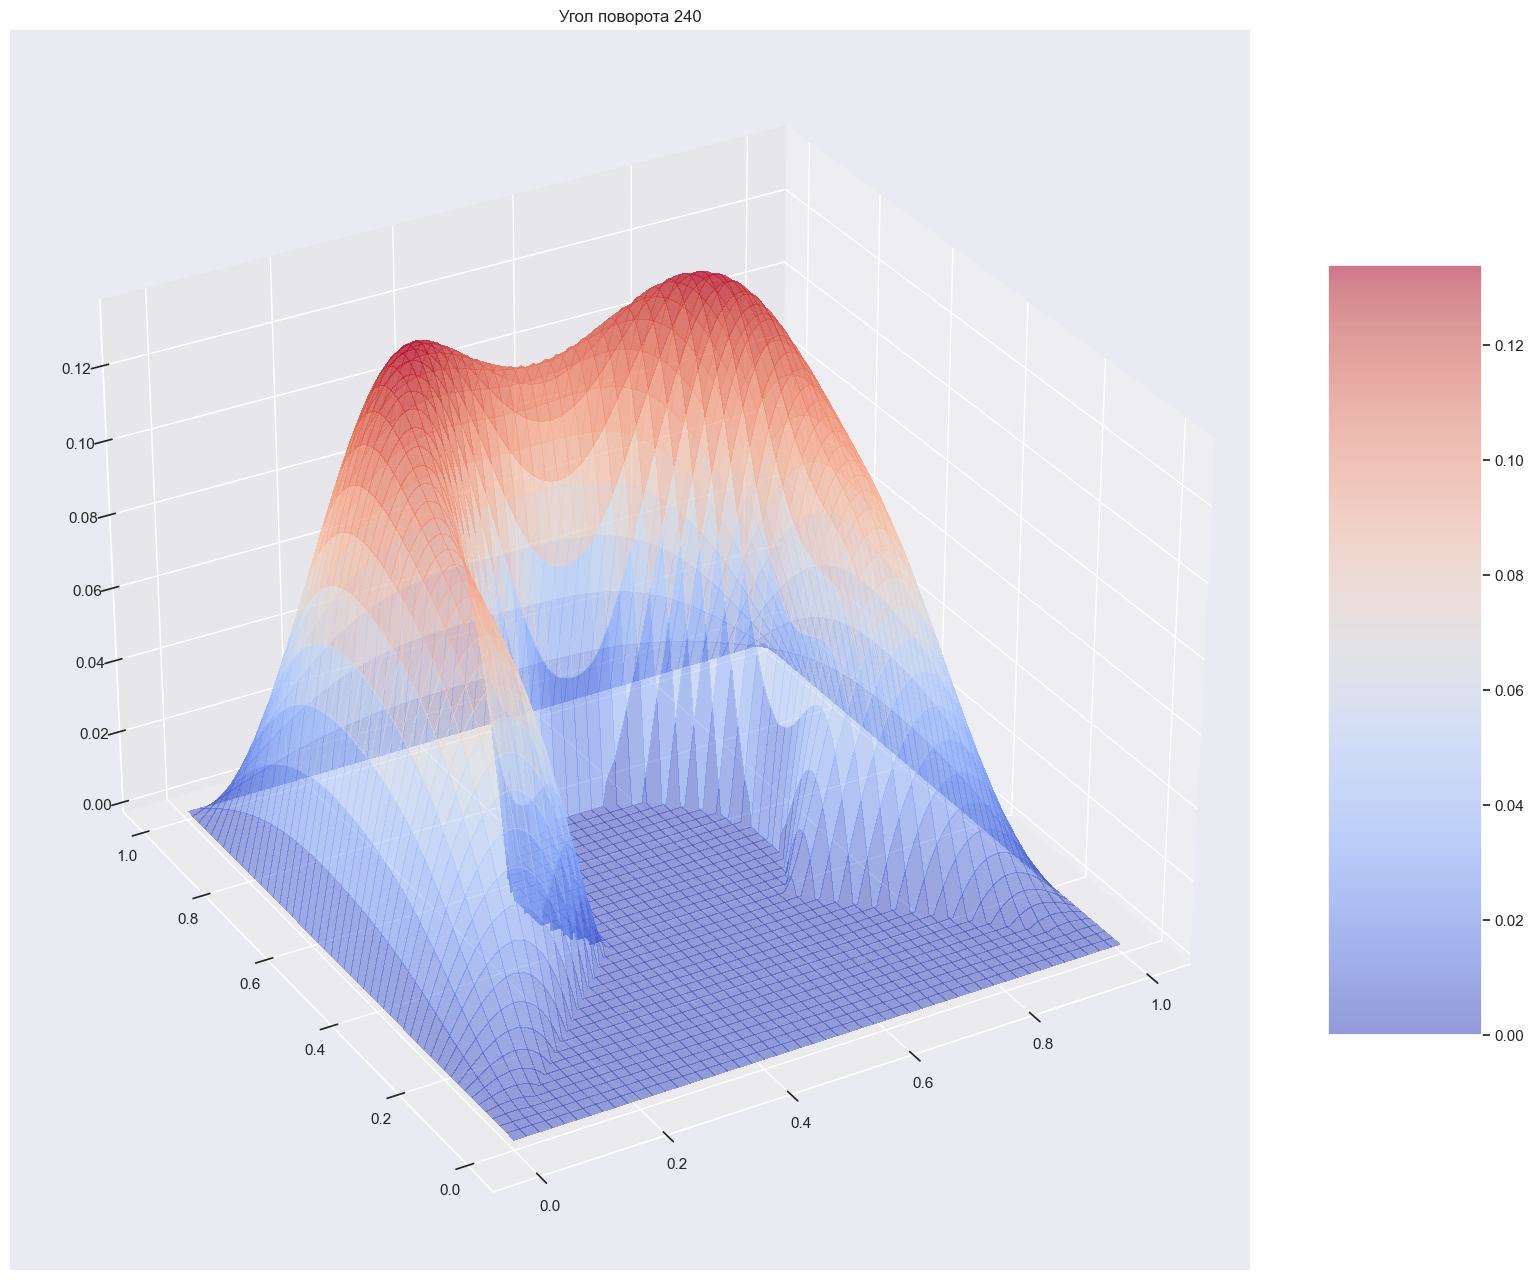

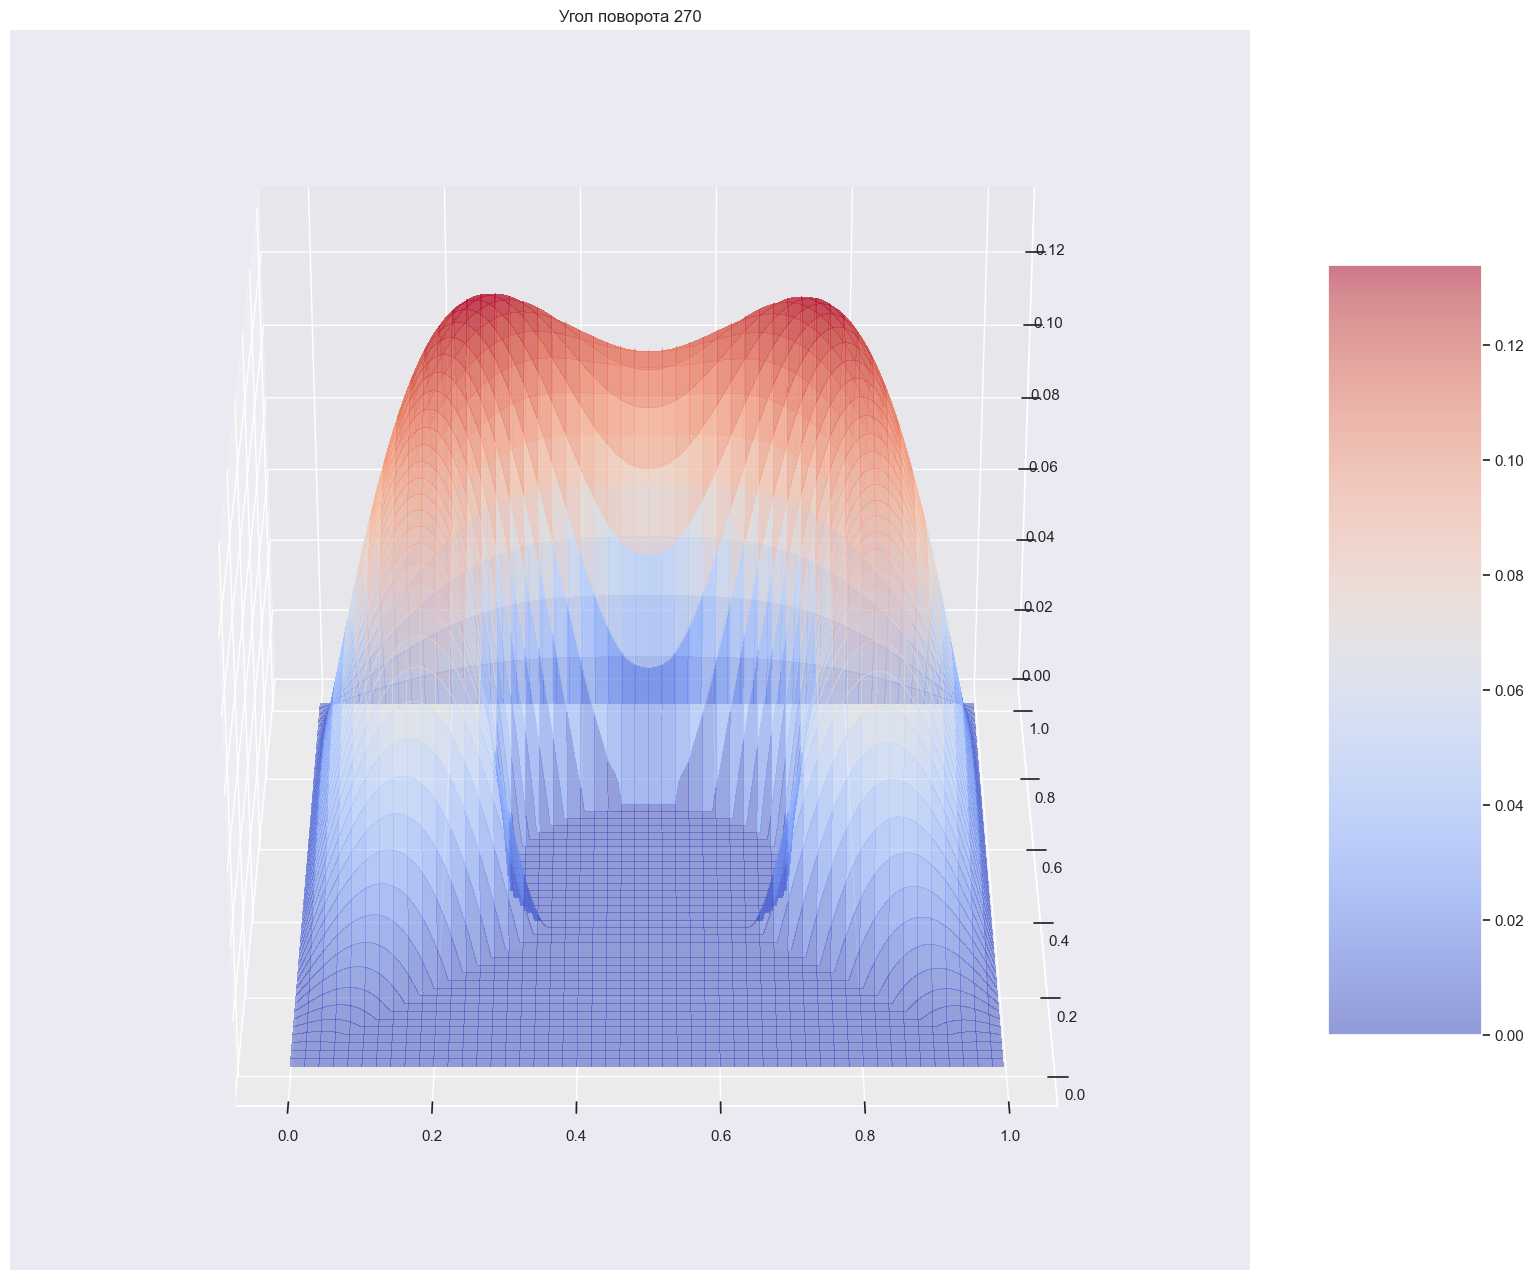

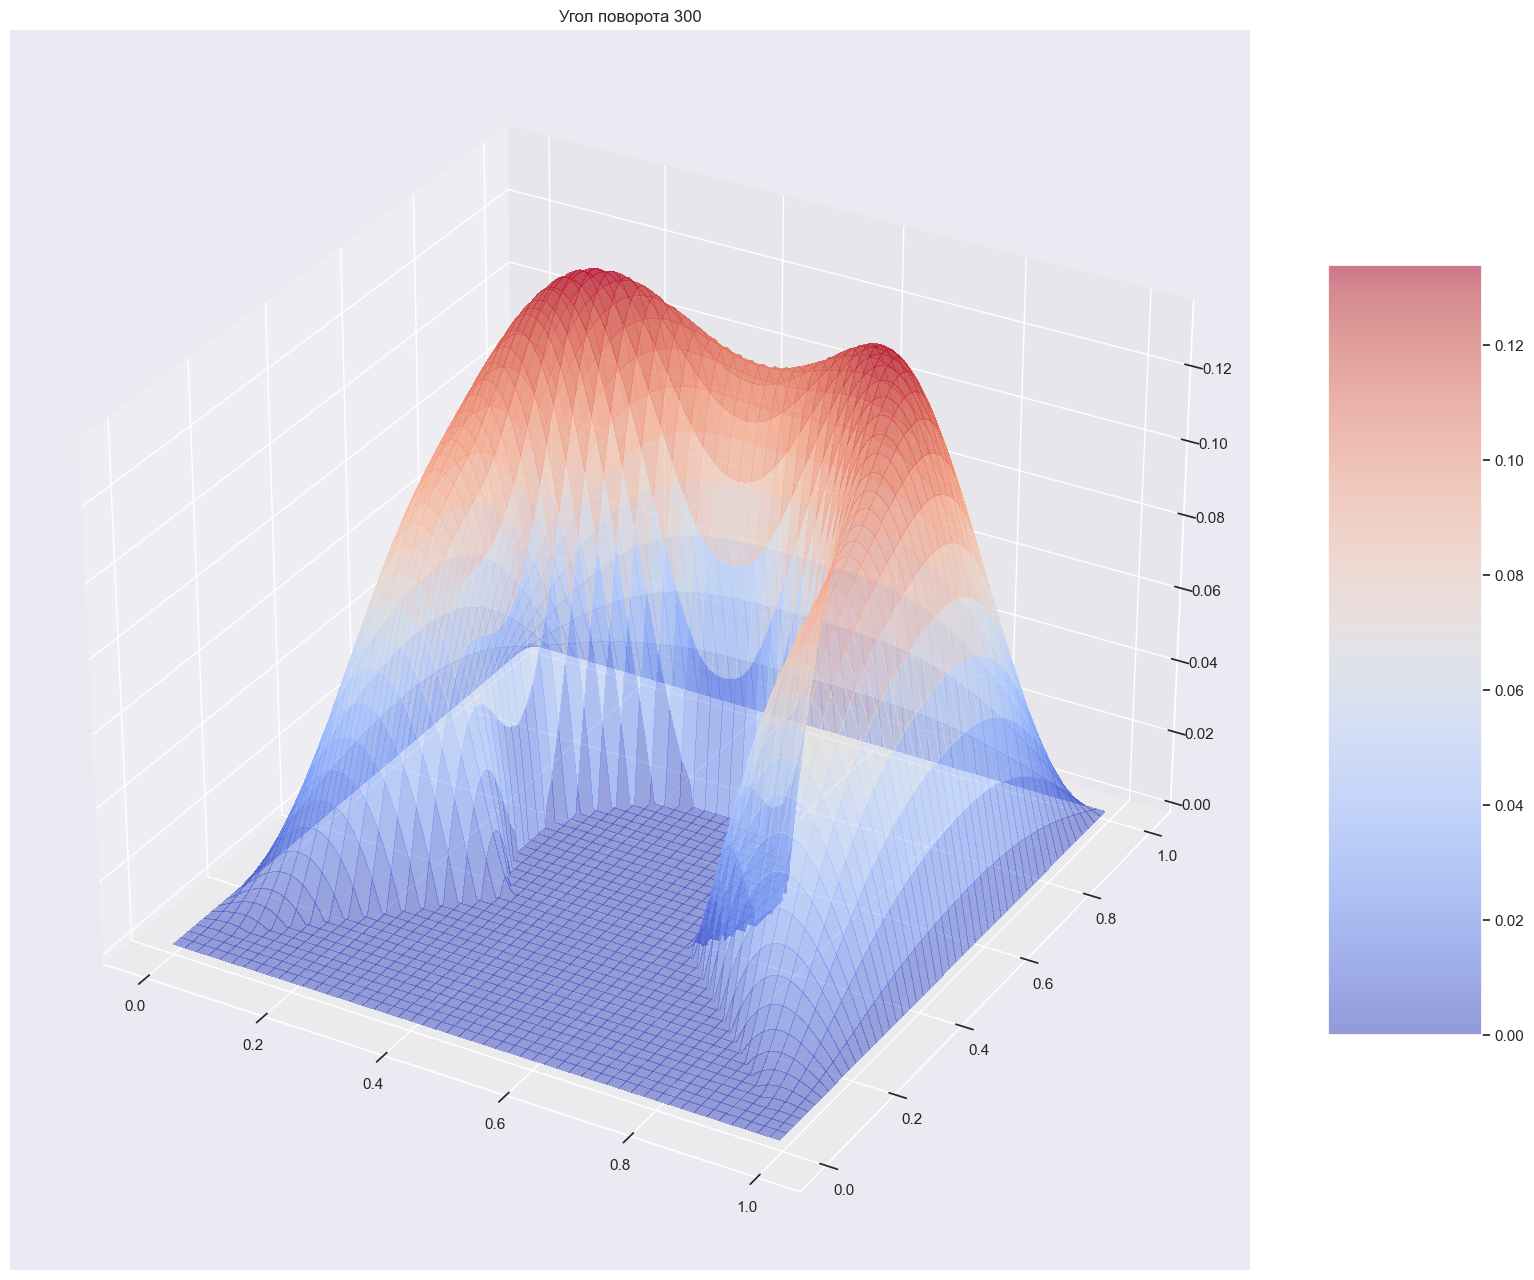

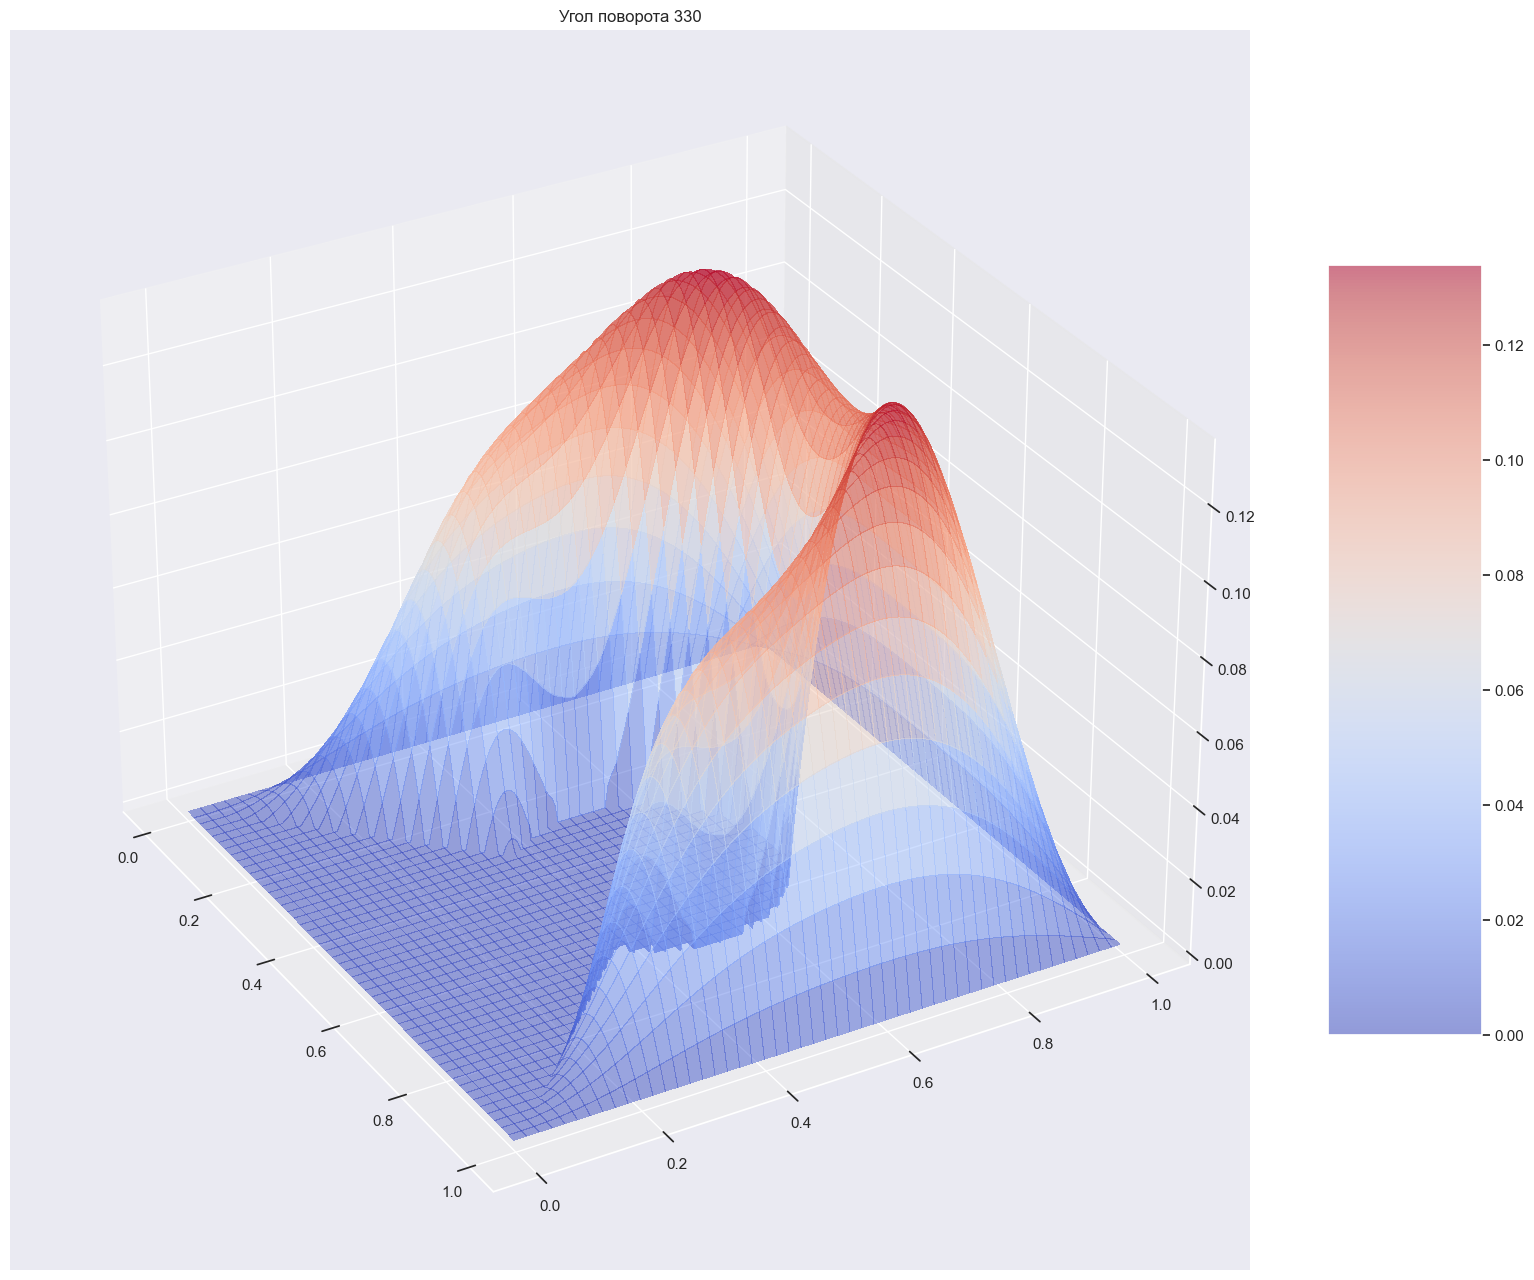

In [211]:
for i in range(12):
    fig = plt.figure(figsize=(20,20))
    ax = plt.axes(projection='3d')
    im = ax.plot_surface(X, Y, U_next, alpha=0.5, cmap=matplotlib.cm.coolwarm,
                           linewidth=0, antialiased=False)
    fig.colorbar(im, shrink=0.5, aspect=5)
    ax.set_title(f'Угол поворота {i*30}');
    ax.view_init(30, i*30)